In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# Create a dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

y = y.reshape(-1, 1)

 

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

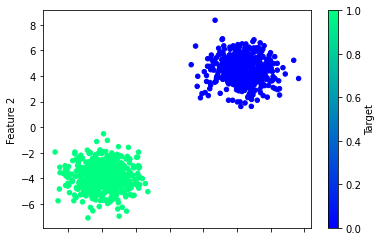

In [24]:
# Create a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plot the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [26]:
#Create the scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [27]:
neuron = Sequential()


In [28]:
number_inputs = 2
number_hidden_nodes = 3

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))



In [29]:
number_classes = 1

neuron.add(Dense(units=number_classes, activation="sigmoid"))


In [30]:
#Display model summary
neuron.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [31]:
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [32]:
# Fitting the model
model = neuron.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
21/24 [=========================>....] - ETA: 0s - loss: 1.2155 - accuracy: 0.0000e+00

2022-09-05 19:26:17.561095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 0s 7ms/step - loss: 1.2127 - accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 1.1524 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 1.1002 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0551 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0156 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9798 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9465 - accuracy: 0.0000e+00
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9143 - accuracy: 0.0000e+00
Epoch 9/100
24/24 [==============================] - 0s 5ms/step - loss: 0.8817 - accuracy: 0.0000e+00
Epoch 10/100
24/24 [==============================] - 0s 5ms/step - loss: 0.8475 - ac

<AxesSubplot:>

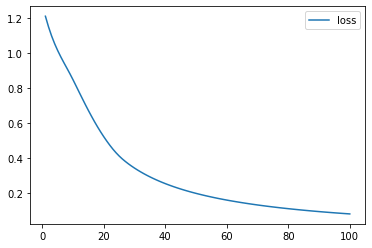

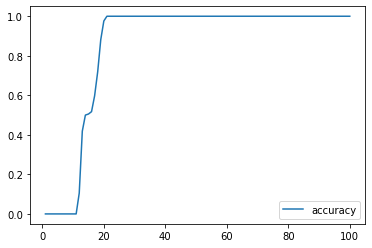

In [33]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

# Plot the accuracy
df.plot(y="accuracy")


In [34]:
# Evaluate the model using testing data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


8/8 - 0s - loss: 0.0737 - accuracy: 1.0000 - 141ms/epoch - 18ms/step
Loss: 0.07370715588331223, Accuracy: 1.0


2022-09-05 19:26:37.966852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [35]:
# Create 10 new samples of dummy data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=1)

# Make predictions
predictions = (neuron.predict(new_X) > 0.5).astype("int32") 


1/1 [==============================] - 0s 41ms/step


2022-09-05 19:26:42.732654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [36]:
# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": new_y})

# Display sample data
results.head(10)


,predictions,actual
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0
